In [1]:
import enum
import attrs
from typing import Optional, Callable, Any, Literal
file_path='/Users/mattia/Desktop/SocialThings/Progetto/ImpressionMIND.csv'
import numpy as np
import scipy.sparse as sp
from scipy.sparse import csr_matrix
import pandas as pd

In [2]:
dfmind=pd.read_csv(file_path, sep=',')
dfmind

,ImpressionID,UserID,Time,History,Impressions,Timestamp,History_encoded,Impressions_encoded
0,14,2769,2019-11-14 12:26:47,"['N60785', 'N11885', 'N38939', 'N25114', 'N449...","['N44698-0', 'N37204-0', 'N36612-0', 'N64174-0...",1.573734e+09,"[56429, 2096, 32155, 16796, 38872, 42557, 1186...","['38554-0', '30229-0', '29571-0', '60195-0', '..."
1,16,1110,2019-11-11 10:53:09,"['N41089', 'N3577', 'N59496', 'N18086', 'N5617...","['N39587-0', 'N19542-1', 'N53214-0', 'N33848-0...",1.573470e+09,"[34545, 28634, 54996, 8986, 51307, 51813, 4327...","['32875-0', '10604-1', '48018-0', '26499-0', '..."
2,31,10784,2019-11-10 12:11:00,"['N46911', 'N1150', 'N8129', 'N53387', 'N38118...","['N61022-0', 'N49279-1', 'N44651-0']",1.573388e+09,"[41014, 1669, 63161, 48209, 31244, 44439, 5021...","['56694-0', '43644-1', '38503-0']"
3,54,2263,2019-11-13 06:58:59,"['N3398', 'N51076', 'N3398', 'N35021', 'N31191...","['N35047-0', 'N14592-0', 'N21216-0', 'N26262-0...",1.573628e+09,"[26645, 45642, 26645, 27804, 23548, 55283, 384...","['27832-0', '5104-0', '12465-0', '18071-0', '5..."
4,78,1854,2019-11-11 05:17:05,"['N60903', 'N13537', 'N28487', 'N61864', 'N350...","['N36703-0', 'N47035-0', 'N43309-0', 'N35937-0...",1.573449e+09,"[56561, 3932, 20542, 57628, 27791, 64207, 1636...","['29672-0', '41152-0', '37012-0', '28820-0', '..."
...,...,...,...,...,...,...,...,...
10027,73015,10496,2019-11-15 08:31:53,"['N32372', 'N30682', 'N25855', 'N34293', 'N424...","['N54277-0', 'N33397-0', 'N19611-0', 'N23355-0...",1.573807e+09,"[24860, 22982, 17618, 26994, 36066, 4177, 4609...","['49198-0', '25998-0', '10681-0', '14841-0', '..."
10028,73073,3263,2019-11-15 15:29:03,"['N2028', 'N62794', 'N20263', 'N51591', 'N2227...","['N512-0', 'N20764-0', 'N6916-0', 'N25673-0', ...",1.573832e+09,"[11424, 58661, 11406, 46214, 13645, 10601, 151...","['45779-0', '11962-0', '61813-0', '17416-0', '..."
10029,73074,5115,2019-11-15 05:16:46,"['N20263', 'N932', 'N4418', 'N22279', 'N22570'...","['N50055-0', 'N6916-0', 'N11784-0', 'N37204-0'...",1.573795e+09,"[11406, 64484, 37979, 13645, 13969, 15081, 493...","['44508-0', '61813-0', '1984-0', '30229-0', '3..."
10030,73096,7629,2019-11-15 15:01:44,"['N44021', 'N135', 'N1150', 'N36739', 'N16251'...","['N19990-0', 'N50775-0', 'N42249-0', 'N22726-0...",1.573830e+09,"[37804, 3890, 1669, 29711, 6948, 21309, 15671,...","['11101-0', '45307-0', '35834-0', '14142-0', '..."


In [3]:
dfMIND = dfmind.sort_values(by='Timestamp')
dfMIND

,ImpressionID,UserID,Time,History,Impressions,Timestamp,History_encoded,Impressions_encoded
6923,152640,11114,2019-11-09 00:04:19,"['N459', 'N39074', 'N62451', 'N41089', 'N53387...","['N20602-0', 'N3491-0', 'N57005-0', 'N37764-0'...",1.573258e+09,"[39889, 32306, 58281, 34545, 48209, 27780, 166...","['11783-0', '27679-0', '52230-0', '30850-0', '..."
134,2915,3357,2019-11-09 00:11:02,"['N39556', 'N24538', 'N17933', 'N19269', 'N475...","['N15134-0', 'N50135-0', 'N31002-0', 'N41881-0...",1.573258e+09,"[32841, 16155, 8816, 10300, 41732, 2661, 29123...","['5707-0', '44597-0', '23339-0', '35425-0', '6..."
190,4096,9800,2019-11-09 00:15:01,"['N30344', 'N39556', 'N932', 'N12411', 'N50035...","['N41881-0', 'N3491-1']",1.573259e+09,"[22607, 32841, 64484, 2682, 44486, 63806, 4825...","['35425-0', '27679-1']"
6701,148136,6636,2019-11-09 00:20:21,"['N459', 'N12900', 'N33513', 'N53753', 'N35120...","['N50135-0', 'N3491-0', 'N41881-0', 'N20602-0'...",1.573259e+09,"[39889, 3225, 26128, 48616, 27914, 38422, 5358...","['44597-0', '27679-0', '35425-0', '11783-0', '..."
3870,85013,3437,2019-11-09 00:22:52,"['N61864', 'N19644', 'N53393', 'N33513', 'N195...","['N62070-0', 'N15134-0', 'N52433-1', 'N61822-0...",1.573259e+09,"[57628, 10717, 48216, 26128, 10601, 25148, 550...","['57858-0', '5707-0', '47150-1', '57582-0', '6..."
...,...,...,...,...,...,...,...,...
8245,28640,6031,2019-11-15 23:11:29,"['N38963', 'N57571', 'N19001', 'N25634', 'N368...","['N56080-0', 'N54562-0', 'N35340-0', 'N30598-0...",1.573859e+09,"[32182, 52858, 10004, 17373, 29838, 59125, 207...","['51202-0', '49515-0', '28158-0', '22888-0', '..."
7796,16965,6825,2019-11-15 23:11:54,"['N6808', 'N48806', 'N2994', 'N25808', 'N6511'...","['N51963-0', 'N4734-0', 'N35340-0', 'N12409-0'...",1.573860e+09,"[61693, 43119, 22156, 17566, 61235, 13941, 313...","['46627-0', '41490-0', '28158-0', '2679-0', '5..."
8753,41423,2058,2019-11-15 23:15:34,"['N1588', 'N5526', 'N13395', 'N8548', 'N21883'...","['N54562-0', 'N30598-1']",1.573860e+09,"[6534, 50290, 3774, 63626, 13205, 17021, 32312...","['49515-0', '22888-1']"
7655,13488,10226,2019-11-15 23:17:29,"['N8548', 'N47438', 'N58235', 'N7580', 'N38816...","['N512-0', 'N60085-0', 'N16396-0', 'N3168-1', ...",1.573860e+09,"[63626, 41599, 53596, 62551, 32019, 56784, 581...","['45779-0', '55652-0', '7108-0', '24090-1', '3..."


In [4]:
dfMIND['Impressions_encoded'] = dfMIND['Impressions_encoded'].apply(lambda x: eval(x))
dfMIND['History_encoded'] = dfMIND['History_encoded'].apply(lambda x: eval(x))

matrice con y_history e y=n.positive/n.totali

In [5]:
import numpy as np
import pandas as pd

user_ids = dfMIND['UserID'].unique()
impression_ids = set()

for impressions in dfMIND['Impressions_encoded']:
    impression_list = impressions
    impression_ids.update([impression for impression in impression_list])

num_users = len(user_ids)
num_impressions = len(impression_ids)
impression_id_to_col = {impression_id: col_index for col_index, impression_id in enumerate(impression_ids)}

# Create the dense matrix
matrix_data = np.zeros((len(dfMIND) * num_impressions, 9), dtype=np.float64)
df_matrix = pd.DataFrame(matrix_data, columns=['Intercept', 'LastSeen', 'ImpCount', 'Position', 'UserFreq', 'User-Item', 'Conversion', 'y', 'y_history'])

user_indices = {}
interaction_counts = {}
last_seen_timestamps = {}
row_index = 0
user_row_count = {}
total_interactions = 0
positive_interactions = 0
history_sum = 0
user_history_counts = {}

for index, row in dfMIND.iterrows():
    user_id = row['UserID']
    if user_id not in user_indices:
        user_indices[user_id] = len(user_indices)
    
    user_index = user_indices[user_id]
    impression_list = row['Impressions_encoded']
    
    if user_id not in user_row_count:
        user_row_count[user_id] = 0

    user_row_count[user_id] += 1
    
    for impression in impression_list:
        col_index = impression_id_to_col[impression]
        user_item_key = f"{user_id}_{col_index}"
        
        if user_item_key not in interaction_counts:
            interaction_counts[user_item_key] = 0
        
        interaction_counts[user_item_key] += 1
        
        if user_item_key not in last_seen_timestamps:
            last_seen_timestamps[user_item_key] = pd.to_datetime(row['Timestamp'], unit='s')
        
        df_matrix.loc[row_index, 'Intercept'] = 1.0
        
        # Considera solo le interazioni positive per calcolare LastSeen e ImpCount
        if impression.endswith('-1'):
            df_matrix.loc[row_index, 'ImpCount'] = interaction_counts[user_item_key]
            df_matrix.loc[row_index, 'Position'] = -1.0
            
            last_seen = last_seen_timestamps[user_item_key]
            time_diff = pd.to_datetime(row['Timestamp'], unit='s') - last_seen
            time_diff_seconds = time_diff.total_seconds()
            
            df_matrix.loc[row_index, 'LastSeen'] = time_diff_seconds
            last_seen_timestamps[user_item_key] = pd.to_datetime(row['Timestamp'], unit='s')
        
        # Assegna UserFreq valore basato sul numero di elementi nella colonna 'History_encoded'
        history_list = row['History_encoded']
        df_matrix.loc[row_index, 'UserFreq'] = user_row_count[user_id]
        
        df_matrix.loc[row_index, 'User-Item'] = f"{user_index} ({user_id}) - {col_index} ({impression})"
        
        if impression.endswith('-1'):
            df_matrix.loc[row_index, 'Conversion'] = 1.0
            positive_interactions += 1
        
        total_interactions += 1
        
        if user_id not in user_history_counts:
            user_history_counts[user_id] = len(history_list)
            history_sum += len(history_list)
        else:
            history_sum += len(history_list) - user_history_counts[user_id]
            user_history_counts[user_id] = len(history_list)
        
        df_matrix.loc[row_index, 'y'] = positive_interactions / total_interactions
        df_matrix.loc[row_index, 'y_history'] = (positive_interactions + history_sum) / (total_interactions + history_sum)
        
        row_index += 1

df_matrix = df_matrix.iloc[:row_index]

print(df_matrix)

        Intercept  LastSeen  ImpCount  Position  UserFreq  \
0             1.0       0.0       0.0       0.0       1.0   
1             1.0       0.0       0.0       0.0       1.0   
2             1.0       0.0       0.0       0.0       1.0   
3             1.0       0.0       0.0       0.0       1.0   
4             1.0       0.0       0.0       0.0       1.0   
...           ...       ...       ...       ...       ...   
430046        1.0       0.0       0.0       0.0       2.0   
430047        1.0       0.0       0.0       0.0       2.0   
430048        1.0       0.0       0.0       0.0       2.0   
430049        1.0       0.0       0.0       0.0       1.0   
430050        1.0       0.0       1.0      -1.0       1.0   

                             User-Item  Conversion         y  y_history  
0           0 (11114) - 5760 (11783-0)         0.0  0.000000   0.980000  
1            0 (11114) - 532 (27679-0)         0.0  0.000000   0.960784  
2           0 (11114) - 2515 (52230-0)       

#######################################################################################################################################################

matrice senza y_history e con y=n.positive/n.sequenze uniche

In [6]:
import numpy as np
import pandas as pd

user_ids = dfMIND['UserID'].unique()
impression_ids = set()

for impressions in dfMIND['Impressions_encoded']:
    impression_list = impressions
    impression_ids.update([impression for impression in impression_list])

num_users = len(user_ids)
num_impressions = len(impression_ids)
impression_id_to_col = {impression_id: col_index for col_index, impression_id in enumerate(impression_ids)}

# Create the dense matrix
matrix_data = np.zeros((len(dfMIND) * num_impressions, 8), dtype=np.float64)
df_matrix = pd.DataFrame(matrix_data, columns=['Intercept', 'LastSeen', 'ImpCount', 'Position', 'UserFreq', 'User-Item', 'Conversion', 'y'])

user_indices = {}
interaction_counts = {}
last_seen_timestamps = {}
row_index = 0
user_row_count = {}
total_interactions = 0
positive_interactions = 0
unique_user_item_pairs = set()

for index, row in dfMIND.iterrows():
    user_id = row['UserID']
    if user_id not in user_indices:
        user_indices[user_id] = len(user_indices)
    
    user_index = user_indices[user_id]
    impression_list = row['Impressions_encoded']
    
    if user_id not in user_row_count:
        user_row_count[user_id] = 0

    user_row_count[user_id] += 1
    
    for impression in impression_list:
        col_index = impression_id_to_col[impression]
        user_item_key = f"{user_id}_{col_index}"
        
        if user_item_key not in interaction_counts:
            interaction_counts[user_item_key] = 0
        
        interaction_counts[user_item_key] += 1
        
        if user_item_key not in last_seen_timestamps:
            last_seen_timestamps[user_item_key] = pd.to_datetime(row['Timestamp'], unit='s')
        
        df_matrix.loc[row_index, 'Intercept'] = 1.0
        
        # Considera solo le interazioni positive per calcolare LastSeen e ImpCount
        if impression.endswith('-1'):
            df_matrix.loc[row_index, 'ImpCount'] = interaction_counts[user_item_key]
            df_matrix.loc[row_index, 'Position'] = -1.0
            
            last_seen = last_seen_timestamps[user_item_key]
            time_diff = pd.to_datetime(row['Timestamp'], unit='s') - last_seen
            time_diff_seconds = time_diff.total_seconds()
            
            df_matrix.loc[row_index, 'LastSeen'] = time_diff_seconds
            last_seen_timestamps[user_item_key] = pd.to_datetime(row['Timestamp'], unit='s')
        

        df_matrix.loc[row_index, 'UserFreq'] = user_row_count[user_id]
        
        df_matrix.loc[row_index, 'User-Item'] = f"{user_index} ({user_id}) - {col_index} ({impression})"
        
        if impression.endswith('-1'):
            df_matrix.loc[row_index, 'Conversion'] = 1.0
            positive_interactions += 1
        
        total_interactions += 1
        unique_user_item_pairs.add(user_item_key)
        df_matrix.loc[row_index, 'y'] = positive_interactions / len(unique_user_item_pairs)
        
        row_index += 1

df_matrix = df_matrix.iloc[:row_index]

print(df_matrix)

        Intercept  LastSeen  ImpCount  Position  UserFreq  \
0             1.0       0.0       0.0       0.0       1.0   
1             1.0       0.0       0.0       0.0       1.0   
2             1.0       0.0       0.0       0.0       1.0   
3             1.0       0.0       0.0       0.0       1.0   
4             1.0       0.0       0.0       0.0       1.0   
...           ...       ...       ...       ...       ...   
430046        1.0       0.0       0.0       0.0       2.0   
430047        1.0       0.0       0.0       0.0       2.0   
430048        1.0       0.0       0.0       0.0       2.0   
430049        1.0       0.0       0.0       0.0       1.0   
430050        1.0       0.0       1.0      -1.0       1.0   

                             User-Item  Conversion         y  
0           0 (11114) - 5760 (11783-0)         0.0  0.000000  
1            0 (11114) - 532 (27679-0)         0.0  0.000000  
2           0 (11114) - 2515 (52230-0)         0.0  0.000000  
3           0 (

In [7]:
unique_user_item_pairs = set()

for index, row in dfMIND.iterrows():
    user_id = row['UserID']
    impression_list = row['Impressions_encoded']
    
    for impression in impression_list:
        col_index = impression_id_to_col[impression]
        user_item_key = f"{user_id}_{col_index}"
        unique_user_item_pairs.add(user_item_key)

num_unique_pairs = len(unique_user_item_pairs)
print("Numero di coppie user-item uniche:", num_unique_pairs)

Numero di coppie user-item uniche: 337724


In [8]:
positive_interactions_count = 0

for index, row in dfMIND.iterrows():
    impression_list = row['Impressions_encoded']
    
    for impression in impression_list:
        if impression.endswith('-1'):
            positive_interactions_count += 1

print("Numero di interazioni positive:", positive_interactions_count)

Numero di interazioni positive: 19140


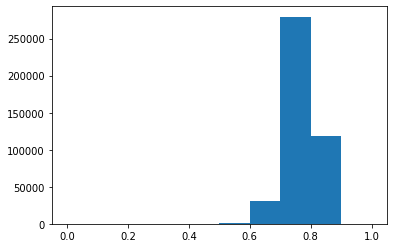

In [9]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Crea una copia del DataFrame df_matrix
df_normalized = df_matrix.copy()

# Seleziona la colonna 'y' da normalizzare
y_values = df_normalized['y'].values.reshape(-1, 1)

# Applica la normalizzazione min-max alla colonna 'y'
scaler = MinMaxScaler()
y_normalized = scaler.fit_transform(y_values)

# Assegna i valori normalizzati alla colonna 'y' nel DataFrame df_normalized
df_normalized['y'] = y_normalized

# Plotta la colonna 'y' normalizzata
plt.hist(df_normalized['y'])
plt.show()

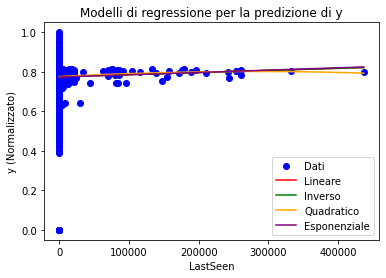

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Normalizza la variabile y nell'intervallo [0, 1]
y_normalized = (df_matrix['y'] - df_matrix['y'].min()) / (df_matrix['y'].max() - df_matrix['y'].min())

# Crea un array di valori di LastSeen per la predizione
LastSeen_range = np.linspace(df_matrix['LastSeen'].min(), df_matrix['LastSeen'].max(), 100)

# Crea i modelli per la regressione lineare, inversa, quadratica ed esponenziale
linear_model = np.poly1d(np.polyfit(df_matrix['LastSeen'], y_normalized, 1))
inverse_model = np.poly1d(np.polyfit(df_matrix['LastSeen'], 1-y_normalized, 1))
quadratic_model = np.poly1d(np.polyfit(df_matrix['LastSeen'], y_normalized, 2))
exponential_model = np.poly1d(np.polyfit(df_matrix['LastSeen'], np.log(y_normalized+1e-8), 1))

# Plotta i modelli
plt.scatter(df_matrix['LastSeen'], y_normalized, color='blue', label='Dati')

plt.plot(LastSeen_range, linear_model(LastSeen_range), color='red', label='Lineare')
plt.plot(LastSeen_range, 1-inverse_model(LastSeen_range), color='green', label='Inverso')
plt.plot(LastSeen_range, quadratic_model(LastSeen_range), color='orange', label='Quadratico')
plt.plot(LastSeen_range, np.exp(exponential_model(LastSeen_range))-1e-8, color='purple', label='Esponenziale')

plt.xlabel('LastSeen')
plt.ylabel('y (Normalizzato)')
plt.title('Modelli di regressione per la predizione di y')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error

# Calcola le previsioni per i modelli
linear_predictions = linear_model(df_matrix['LastSeen'])
inverse_predictions = 1 - inverse_model(df_matrix['LastSeen'])
quadratic_predictions = quadratic_model(df_matrix['LastSeen'])
exponential_predictions = np.exp(exponential_model(df_matrix['LastSeen'])) - 1e-8

# Calcola l'RMSE per i modelli
linear_rmse_ls = np.sqrt(mean_squared_error(y_normalized, linear_predictions))
inverse_rmse_ls = np.sqrt(mean_squared_error(y_normalized, inverse_predictions))
quadratic_rmse_ls = np.sqrt(mean_squared_error(y_normalized, quadratic_predictions))
exponential_rmse_ls = np.sqrt(mean_squared_error(y_normalized, exponential_predictions))

# Stampa i valori RMSE
print("RMSE (Lineare):", linear_rmse_ls)
print("RMSE (Inverso):", inverse_rmse_ls)
print("RMSE (Quadratico):", quadratic_rmse_ls)
print("RMSE (Esponenziale):", exponential_rmse_ls)

RMSE (Lineare): 0.039720616719346846
RMSE (Inverso): 0.03972061671934684
RMSE (Quadratico): 0.03972057017735285
RMSE (Esponenziale): 0.03976519485547051


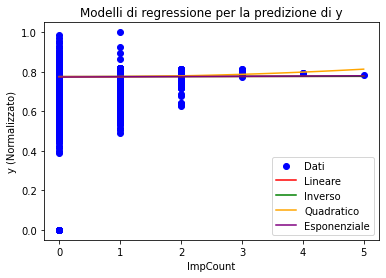

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Normalizza la variabile y nell'intervallo [0, 1]
y_normalized = (df_matrix['y'] - df_matrix['y'].min()) / (df_matrix['y'].max() - df_matrix['y'].min())

# Crea un array di valori di ImpCount per la predizione
ImpCount_range = np.linspace(df_matrix['ImpCount'].min(), df_matrix['ImpCount'].max(), 100)

# Crea i modelli per la regressione lineare, inversa, quadratica ed esponenziale
linear_model = np.poly1d(np.polyfit(df_matrix['ImpCount'], y_normalized, 1))
inverse_model = np.poly1d(np.polyfit(df_matrix['ImpCount'], 1-y_normalized, 1))
quadratic_model = np.poly1d(np.polyfit(df_matrix['ImpCount'], y_normalized, 2))
exponential_model = np.poly1d(np.polyfit(df_matrix['ImpCount'], np.log(y_normalized+1e-8), 1))

# Plotta i modelli
plt.scatter(df_matrix['ImpCount'], y_normalized, color='blue', label='Dati')

plt.plot(ImpCount_range, linear_model(ImpCount_range), color='red', label='Lineare')
plt.plot(ImpCount_range, 1-inverse_model(ImpCount_range), color='green', label='Inverso')
plt.plot(ImpCount_range, quadratic_model(ImpCount_range), color='orange', label='Quadratico')
plt.plot(ImpCount_range, np.exp(exponential_model(ImpCount_range))-1e-8, color='purple', label='Esponenziale')

plt.xlabel('ImpCount')
plt.ylabel('y (Normalizzato)')
plt.title('Modelli di regressione per la predizione di y')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error

# Calcola le previsioni per i modelli
linear_predictions = linear_model(df_matrix['ImpCount'])
inverse_predictions = 1 - inverse_model(df_matrix['ImpCount'])
quadratic_predictions = quadratic_model(df_matrix['ImpCount'])
exponential_predictions = np.exp(exponential_model(df_matrix['ImpCount'])) - 1e-8

# Calcola l'RMSE per i modelli
linear_rmse_ic = np.sqrt(mean_squared_error(y_normalized, linear_predictions))
inverse_rmse_ic = np.sqrt(mean_squared_error(y_normalized, inverse_predictions))
quadratic_rmse_ic = np.sqrt(mean_squared_error(y_normalized, quadratic_predictions))
exponential_rmse_ic = np.sqrt(mean_squared_error(y_normalized, exponential_predictions))

# Stampa i valori RMSE
print("RMSE (Lineare):", linear_rmse_ic)
print("RMSE (Inverso):", inverse_rmse_ic)
print("RMSE (Quadratico):", quadratic_rmse_ic)
print("RMSE (Esponenziale):", exponential_rmse_ic)

RMSE (Lineare): 0.03972093309143529
RMSE (Inverso): 0.03972093309143528
RMSE (Quadratico): 0.03972074355643601
RMSE (Esponenziale): 0.03976592792713942


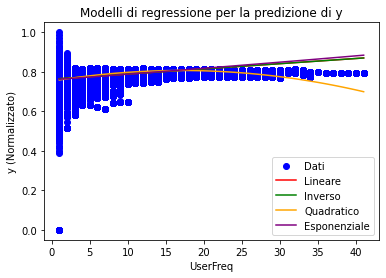

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Normalizza la variabile y nell'intervallo [0, 1]
y_normalized = (df_matrix['y'] - df_matrix['y'].min()) / (df_matrix['y'].max() - df_matrix['y'].min())

# Crea un array di valori di UserFreq per la predizione
UserFreq_range = np.linspace(df_matrix['UserFreq'].min(), df_matrix['UserFreq'].max(), 100)

# Crea i modelli per la regressione lineare, inversa, quadratica ed esponenziale
linear_model = np.poly1d(np.polyfit(df_matrix['UserFreq'], y_normalized, 1))
inverse_model = np.poly1d(np.polyfit(df_matrix['UserFreq'], 1-y_normalized, 1))
quadratic_model = np.poly1d(np.polyfit(df_matrix['UserFreq'], y_normalized, 2))
exponential_model = np.poly1d(np.polyfit(df_matrix['UserFreq'], np.log(y_normalized+1e-8), 1))

# Plotta i modelli
plt.scatter(df_matrix['UserFreq'], y_normalized, color='blue', label='Dati')

plt.plot(UserFreq_range, linear_model(UserFreq_range), color='red', label='Lineare')
plt.plot(UserFreq_range, 1-inverse_model(UserFreq_range), color='green', label='Inverso')
plt.plot(UserFreq_range, quadratic_model(UserFreq_range), color='orange', label='Quadratico')
plt.plot(UserFreq_range, np.exp(exponential_model(UserFreq_range))-1e-8, color='purple', label='Esponenziale')

plt.xlabel('UserFreq')
plt.ylabel('y (Normalizzato)')
plt.title('Modelli di regressione per la predizione di y')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error

# Calcola le previsioni per i modelli
linear_predictions = linear_model(df_matrix['UserFreq'])
inverse_predictions = 1 - inverse_model(df_matrix['UserFreq'])
quadratic_predictions = quadratic_model(df_matrix['UserFreq'])
exponential_predictions = np.exp(exponential_model(df_matrix['UserFreq'])) - 1e-8

# Calcola l'RMSE per i modelli
linear_rmse_uf = np.sqrt(mean_squared_error(y_normalized, linear_predictions))
inverse_rmse_uf = np.sqrt(mean_squared_error(y_normalized, inverse_predictions))
quadratic_rmse_uf = np.sqrt(mean_squared_error(y_normalized, quadratic_predictions))
exponential_rmse_uf = np.sqrt(mean_squared_error(y_normalized, exponential_predictions))

# Stampa i valori RMSE
print("RMSE (Lineare):", linear_rmse_uf)
print("RMSE (Inverso):", inverse_rmse_uf)
print("RMSE (Quadratico):", quadratic_rmse_uf)
print("RMSE (Esponenziale):", exponential_rmse_uf)

RMSE (Lineare): 0.03778142955278009
RMSE (Inverso): 0.03778142955278008
RMSE (Quadratico): 0.03688723196639519
RMSE (Esponenziale): 0.03790054287833052


matrice con LastSeen in giorni

In [16]:
import numpy as np
import pandas as pd

user_ids = dfMIND['UserID'].unique()
impression_ids = set()

for impressions in dfMIND['Impressions_encoded']:
    impression_list = impressions
    impression_ids.update([impression for impression in impression_list])

num_users = len(user_ids)
num_impressions = len(impression_ids)
impression_id_to_col = {impression_id: col_index for col_index, impression_id in enumerate(impression_ids)}

# Create the dense matrix
matrix_data = np.zeros((len(dfMIND) * num_impressions, 8), dtype=np.float64)
df_matrix = pd.DataFrame(matrix_data, columns=['Intercept', 'LastSeen', 'ImpCount', 'Position', 'UserFreq', 'User-Item', 'Conversion', 'y'])

user_indices = {}
interaction_counts = {}
last_seen_timestamps = {}
row_index = 0
user_row_count = {}
total_interactions = 0
positive_interactions = 0
unique_user_item_pairs = set()

for index, row in dfMIND.iterrows():
    user_id = row['UserID']
    if user_id not in user_indices:
        user_indices[user_id] = len(user_indices)
    
    user_index = user_indices[user_id]
    impression_list = row['Impressions_encoded']
    
    if user_id not in user_row_count:
        user_row_count[user_id] = 0

    user_row_count[user_id] += 1
    
    for impression in impression_list:
        col_index = impression_id_to_col[impression]
        user_item_key = f"{user_id}_{col_index}"
        
        if user_item_key not in interaction_counts:
            interaction_counts[user_item_key] = 0
        
        interaction_counts[user_item_key] += 1
        
        if user_item_key not in last_seen_timestamps:
            last_seen_timestamps[user_item_key] = pd.to_datetime(row['Timestamp'], unit='s')
        
        df_matrix.loc[row_index, 'Intercept'] = 1.0
        
        # Considera solo le interazioni positive per calcolare LastSeen e ImpCount
        if impression.endswith('-1'):
            df_matrix.loc[row_index, 'ImpCount'] = interaction_counts[user_item_key]
            df_matrix.loc[row_index, 'Position'] = -1.0
            
            last_seen = last_seen_timestamps[user_item_key]
            time_diff = pd.to_datetime(row['Timestamp'], unit='s') - last_seen
            time_diff_days = time_diff.total_seconds() / (24 * 60 * 60)  # Converti in giorni
            
            df_matrix.loc[row_index, 'LastSeen'] = time_diff_days
            last_seen_timestamps[user_item_key] = pd.to_datetime(row['Timestamp'], unit='s')
        

        df_matrix.loc[row_index, 'UserFreq'] = user_row_count[user_id]
        
        df_matrix.loc[row_index, 'User-Item'] = f"{user_index} ({user_id}) - {col_index} ({impression})"
        
        if impression.endswith('-1'):
            df_matrix.loc[row_index, 'Conversion'] = 1.0
            positive_interactions += 1
        
        total_interactions += 1
        unique_user_item_pairs.add(user_item_key)
        df_matrix.loc[row_index, 'y'] = positive_interactions / len(unique_user_item_pairs)
        
        row_index += 1

df_matrix = df_matrix.iloc[:row_index]

print(df_matrix)

        Intercept  LastSeen  ImpCount  Position  UserFreq  \
0             1.0       0.0       0.0       0.0       1.0   
1             1.0       0.0       0.0       0.0       1.0   
2             1.0       0.0       0.0       0.0       1.0   
3             1.0       0.0       0.0       0.0       1.0   
4             1.0       0.0       0.0       0.0       1.0   
...           ...       ...       ...       ...       ...   
430046        1.0       0.0       0.0       0.0       2.0   
430047        1.0       0.0       0.0       0.0       2.0   
430048        1.0       0.0       0.0       0.0       2.0   
430049        1.0       0.0       0.0       0.0       1.0   
430050        1.0       0.0       1.0      -1.0       1.0   

                             User-Item  Conversion         y  
0           0 (11114) - 5760 (11783-0)         0.0  0.000000  
1            0 (11114) - 532 (27679-0)         0.0  0.000000  
2           0 (11114) - 2515 (52230-0)         0.0  0.000000  
3           0 (

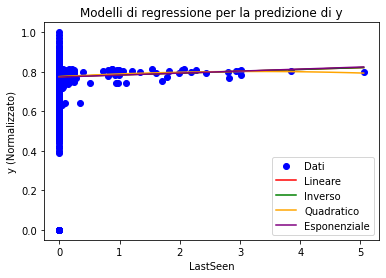

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Normalizza la variabile y nell'intervallo [0, 1]
y_normalized = (df_matrix['y'] - df_matrix['y'].min()) / (df_matrix['y'].max() - df_matrix['y'].min())

# Crea un array di valori di LastSeen per la predizione
LastSeen_range = np.linspace(df_matrix['LastSeen'].min(), df_matrix['LastSeen'].max(), 100)

# Crea i modelli per la regressione lineare, inversa, quadratica ed esponenziale
linear_model = np.poly1d(np.polyfit(df_matrix['LastSeen'], y_normalized, 1))
inverse_model = np.poly1d(np.polyfit(df_matrix['LastSeen'], 1-y_normalized, 1))
quadratic_model = np.poly1d(np.polyfit(df_matrix['LastSeen'], y_normalized, 2))
exponential_model = np.poly1d(np.polyfit(df_matrix['LastSeen'], np.log(y_normalized+1e-8), 1))

# Plotta i modelli
plt.scatter(df_matrix['LastSeen'], y_normalized, color='blue', label='Dati')

plt.plot(LastSeen_range, linear_model(LastSeen_range), color='red', label='Lineare')
plt.plot(LastSeen_range, 1-inverse_model(LastSeen_range), color='green', label='Inverso')
plt.plot(LastSeen_range, quadratic_model(LastSeen_range), color='orange', label='Quadratico')
plt.plot(LastSeen_range, np.exp(exponential_model(LastSeen_range))-1e-8, color='purple', label='Esponenziale')

plt.xlabel('LastSeen')
plt.ylabel('y (Normalizzato)')
plt.title('Modelli di regressione per la predizione di y')
plt.legend()
plt.show()